## Imports

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
%matplotlib inline

## Exploratory Data Analysis

In [76]:
main_data = pd.read_csv('csv/data.csv')
genre_data = pd.read_csv('csv/data_by_genres.csv')
year_data = pd.read_csv('csv/data_by_year.csv')

In [77]:
main_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [78]:
genre_data.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.166667,5,1
1,[],0.679245,0.521473,2.298526e+05,0.401522,0.196737,0.221586,-12.679076,0.112267,112.025168,0.515920,21.682005,7,1
2,a cappella,0.621532,0.577017,1.936522e+05,0.345694,0.003799,0.127087,-12.770211,0.095324,111.813230,0.453186,43.351819,11,1
3,abstract,0.359395,0.459500,3.430185e+05,0.487000,0.791400,0.119480,-14.092000,0.043420,124.743200,0.304990,41.500000,1,1
4,abstract beats,0.353347,0.694400,2.338244e+05,0.613400,0.349403,0.102453,-6.699800,0.143453,119.398400,0.634187,58.600000,10,0


In [79]:
year_data.head()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1921,0.895823,0.425661,229911.914062,0.236784,0.322330,0.215814,-17.095437,0.077258,100.397758,0.425495,0.351562,7,1
1,1922,0.939236,0.480000,167904.541667,0.237026,0.440470,0.238647,-19.179958,0.115419,101.376139,0.534056,0.138889,10,1
2,1923,0.976329,0.568462,178356.301775,0.246936,0.401932,0.236656,-14.373882,0.098619,112.456598,0.624788,5.727811,0,1
3,1924,0.935575,0.548654,188461.649789,0.347033,0.583955,0.237875,-14.202304,0.090210,120.653359,0.668574,0.603376,10,1
4,1925,0.965422,0.571890,184130.699620,0.264373,0.408893,0.243094,-14.516707,0.115457,115.671715,0.616430,2.707224,5,1


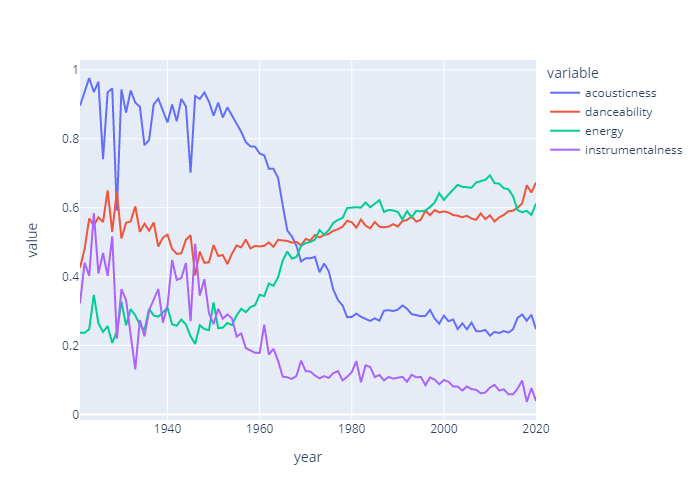

In [80]:
import plotly.express as px 
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness']
fig = px.line(year_data, x='year', y=sound_features)
fig.show("png")

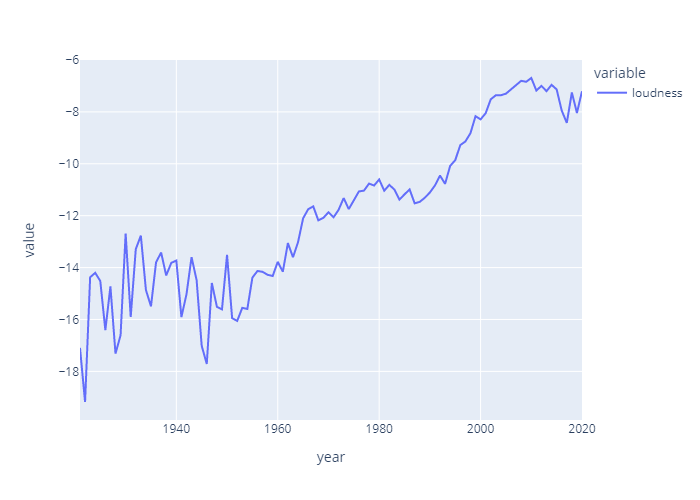

In [81]:
fig_1 = px.line(year_data, x='year', y=['loudness'])
fig_1.show("png")

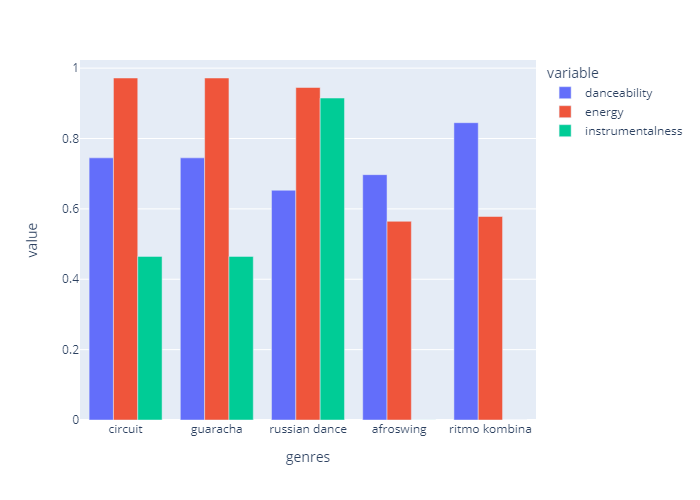

In [82]:
top5_genre = genre_data.nlargest(5, 'popularity')
fig = px.bar(top5_genre, x='genres', y=['danceability', 'energy', 'instrumentalness'], barmode='group')
fig.show("png")

## Genre Clusters using K-Means Algorithm

In [83]:
genre_pipeline = Pipeline([('scaler', StandardScaler()), 
                    ('kmeans', KMeans(n_clusters=5))])

X = genre_data.select_dtypes(np.number)
genre_pipeline.fit(X)
genre_data['cluster'] = genre_pipeline.predict(X)

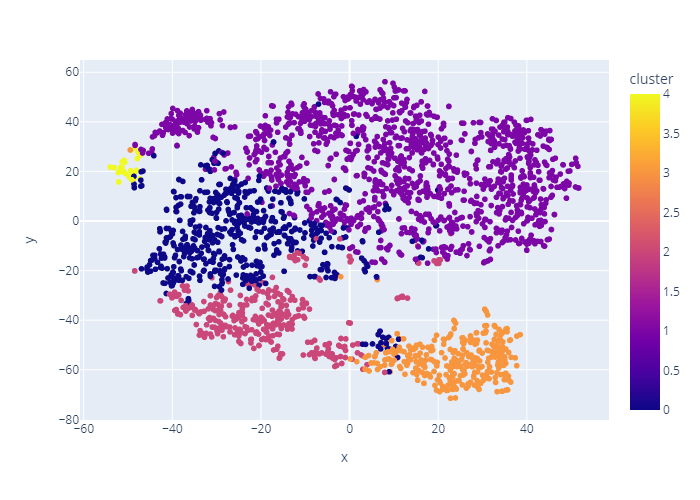

In [84]:
tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

fig = px.scatter(projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show("png")

## Song clustering with K-Means

In [85]:
pipeline = Pipeline([('scaler', StandardScaler()), 
                    ('kmeans', KMeans(n_clusters=20, 
                    verbose=2))],verbose=True)

X = main_data.select_dtypes(np.number)
number_cols = list(X.columns)
pipeline.fit(X)
song_cluster_labels = pipeline.predict(X)
main_data['cluster_label'] = song_cluster_labels                 

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
Initialization complete
Iteration 0, inertia 1497813.298021988
Iteration 1, inertia 1168757.355830151
Iteration 2, inertia 1122655.6661645675
Iteration 3, inertia 1098052.6846011898
Iteration 4, inertia 1085965.2467919653
Iteration 5, inertia 1079629.2069752356
Iteration 6, inertia 1075426.0799919476
Iteration 7, inertia 1072475.9951960498
Iteration 8, inertia 1070801.286060274
Iteration 9, inertia 1069890.1357328875
Iteration 10, inertia 1069336.7163278118
Iteration 11, inertia 1068976.8254751915
Iteration 12, inertia 1068725.936010513
Iteration 13, inertia 1068554.5905009303
Iteration 14, inertia 1068424.3993308244
Iteration 15, inertia 1068327.578539561
Iteration 16, inertia 1068259.5772763412
Iteration 17, inertia 1068219.9555816918
Iteration 18, inertia 1068193.4476060597
Iteration 19, inertia 1068172.1829742775
Iteration 20, inertia 1068156.4397128955
Iteration 21, inertia 1068143.8934621352
Iteration 22, iner

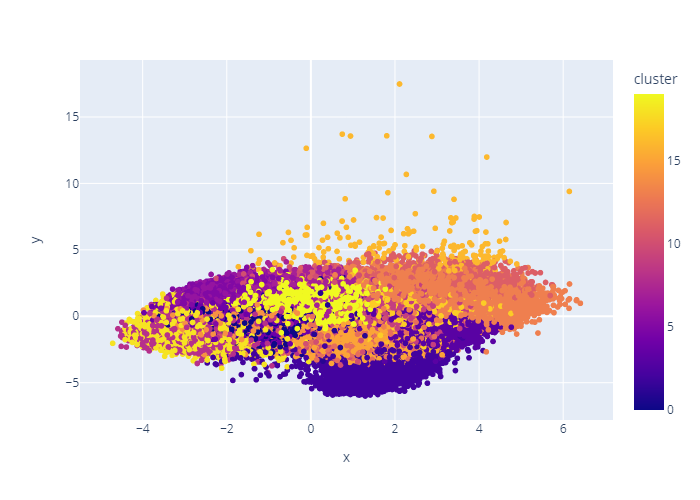

In [86]:
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X)

projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = main_data['name']
projection['cluster'] = main_data['cluster_label']

fig = px.scatter(projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'])
fig.show("png")

In [87]:
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict

# os.environ["SPOTIFY_CLIENT_ID"] = "1c89aaec2ce044568fb7351069cd9a50"
# os.environ["SPOTIFY_CLIENT_SECRET"] = "9602eaa47f6448449bd8e47e196d6273"

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=os.environ["SPOTIFY_CLIENT_ID"],
                                                            client_secret=os.environ["SPOTIFY_CLIENT_SECRET"]))


def find_song(name, year):
    
    song_data = defaultdict()
    results = sp.search(q= 'track: {} year: {}'.format(name,
                                                       year), limit=1)
    if results['tracks']['items'] == []:
        return None
    
    results = results['tracks']['items'][0]

    track_id = results['id']
    audio_features = sp.audio_features(track_id)[0]
    
    song_data['name'] = [name]
    song_data['year'] = [year]
    song_data['explicit'] = [int(results['explicit'])]
    song_data['duration_ms'] = [results['duration_ms']]
    song_data['popularity'] = [results['popularity']]
    
    for key, value in audio_features.items():
        song_data[key] = value
    
    return pd.DataFrame(song_data)
    

In [88]:
from collections import defaultdict
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import difflib

number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']

def get_song_data(song, spotify_data):
    
    try:
        song_data = spotify_data[(spotify_data['name'] == song['name']) 
                                & (spotify_data['year'] == song['year'])].iloc[0]
        return song_data
    
    except IndexError:
        return find_song(song['name'], song['year'])
        

def get_mean_vector(song_list, spotify_data):
    
    song_vectors = []
    
    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)  
    
    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)

def flatten_dict_list(dict_list):
    
    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []
    
    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)
            
    return flattened_dict
        

def recommend_songs( song_list, spotify_data, n_songs=10):
    
    metadata_cols = ['name', 'year', 'artists']
    song_dict = flatten_dict_list(song_list)
    
    song_center = get_mean_vector(song_list, spotify_data)
    scaler = pipeline.steps[0][1]
    scaled_data = scaler.transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances)[:, :n_songs][0])
    
    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]
    return rec_songs[metadata_cols].to_dict(orient='records')


In [89]:
recommend_songs([{'name': 'Come As You Are', 'year':1991},
                {'name': 'Smells Like Teen Spirit', 'year': 1991},
                {'name': 'Lithium', 'year': 1992},
                {'name': 'All Apologies', 'year': 1993},
                {'name': 'Stay Away', 'year': 1993}],  main_data)


C:\Users\pc 3\AppData\Local\Temp/ipykernel_14580/2491972202.py:32: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



[{'name': 'Dear Limmertz', 'year': 1990, 'artists': "['Azymuth']"},
 {'name': 'When Will It Rain', 'year': 1992, 'artists': "['Jackyl']"},
 {'name': 'Kiss This Thing Goodbye',
  'year': 1989,
  'artists': "['Del Amitri']"},
 {'name': 'Plans',
  'year': 2016,
  'artists': "['Elephante', 'Brandyn Burnette']"},
 {'name': 'Thank You', 'year': 1994, 'artists': "['Boyz II Men']"},
 {'name': 'Love Like This', 'year': 1998, 'artists': "['Faith Evans']"},
 {'name': 'Felt Good On My Lips', 'year': 2010, 'artists': "['Tim McGraw']"},
 {'name': '16', 'year': 2019, 'artists': "['Highly Suspect']"},
 {'name': 'Fourth Of July', 'year': 1994, 'artists': "['Dave Alvin']"},
 {'name': 'Dope Game', 'year': 2000, 'artists': "['South Park Mexican']"}]

In [90]:
recommend_songs([{'name': 'Slow Dancing in a Burning Room', 'year': 2006},
                {'name': 'The Reason', 'year': 2003}], main_data)

[{'name': 'Little Game', 'year': 2014, 'artists': "['Benny']"},
 {'name': 'The Last Chair Violinist (feat. Carolyn Rodriguez)',
  'year': 2008,
  'artists': "['South Park Mexican', 'Carolyn Rodriguez']"},
 {'name': 'Just Friends',
  'year': 2018,
  'artists': "['Hayden James', 'Boy Matthews']"},
 {'name': '魔鬼中的天使', 'year': 2011, 'artists': "['Hebe Tien']"},
 {'name': 'Blackout',
  'year': 2008,
  'artists': '["\'In The Heights\' Original Broadway Company"]'},
 {'name': 'Still the One', 'year': 1976, 'artists': "['Orleans']"},
 {'name': 'Dead Man Walking', 'year': 2007, 'artists': "['bloodsimple']"},
 {'name': 'Tomorrow Never Comes',
  'year': 2015,
  'artists': "['Zac Brown Band']"},
 {'name': 'Mountain Annie', 'year': 2013, 'artists': "['Fruition']"},
 {'name': 'Pornstar Champion (We Will Rock You)',
  'year': 2004,
  'artists': "['Scum of the Earth']"}]